## Week 7: Day 1 – Pipeline Building

In [31]:
# filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [47]:
# Importing required packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [48]:
# loading the dataset
wine=pd.read_csv("C:\\Users\\phera\\Desktop\\datasets\\winequality-red.csv", sep=';')

In [49]:
# The head() function is used to get the first n rows.
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
#The info() method prints information about the DataFrame.
# The information contains the number of columns, column labels, column data types, memory usage, range index, and the number 
# of cells in each column (non-null values).
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [51]:
# Check for NA or missing values in features.
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [52]:
# Preprocessing Data
bins=(2, 6.5, 8)   #2 bins of quality, spread of 6.5, index of 8
group_names=["bad", "good"]
wine["quality"]=pd.cut(wine["quality"], bins=bins, labels=group_names) #cutting it by the bins, using labels
wine["quality"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [53]:
#now assign labels to quality
label_quality=LabelEncoder()

In [54]:
#Bad becomes 0,and good becomes 1
wine["quality"]=label_quality.fit_transform(wine["quality"])

In [55]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [56]:
# Print the first 5 rows.
wine["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

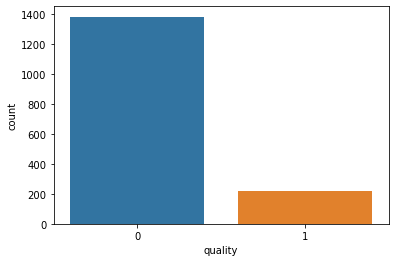

In [57]:
# plotting the data
sns.countplot(wine["quality"])

In [58]:
#Now seperate the dataset as response variable and feature variables
X=wine.drop("quality", axis=1)
y=wine["quality"]

In [59]:
#Train and Test splitting of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Applying Standard scaling to get optimized result

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Random Forest Classifier

In [61]:
# random forest model creation
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
# predictions
pred_rfc=rfc.predict(X_test)

In [63]:
# lets see how our model performed 
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

[[265   8]
 [ 22  25]]


### SVM Classifier

In [64]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf= clf.predict(X_test)

In [65]:
# lets see how our model performed 
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


### Neural Networks

MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

This implementation works with data represented as dense numpy arrays or sparse scipy arrays of floating point values.

In [71]:
# hidden layers of 11 nodes each, since we have 11 variables
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500) #default max iteration is 200
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

In [72]:
# lets see how our model performed 
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.64      0.45      0.52        47

    accuracy                           0.88       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.87      0.88      0.87       320

[[261  12]
 [ 26  21]]


In [73]:
# The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct 
# predictions.
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test, pred_rfc)
cm

0.90625

In [74]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [75]:
Xnew=[[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
Xnew=sc.transform(Xnew)
ynew= rfc.predict(Xnew)
ynew

array([0])

### We will be developing a pipeline to train our model using the Iris dataset. The problem statement is to predict the species of an Iris data using four different features, as shown in the following flowchart:

In [1]:
# Importing necessary packages for displaying images
from PIL import Image
import numpy as np
from IPython.display import display

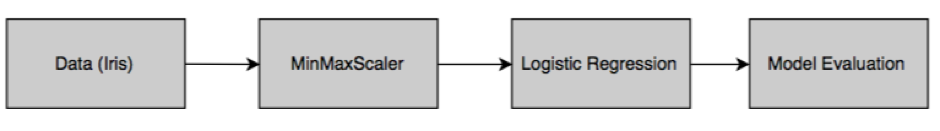

In [2]:
im=Image.open('pipelinebuilding.png')
display(im)
array=np.array

In [84]:
# import from scikit-learn various libraries that will provide methods to accomplish the task. We have to add the 
#Pipeline method from sklearn.pipeline,which will provide us with the necessary methods needed to create an ML pipeline:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [85]:
# Load the data
iris=load_iris()

In [86]:
#load the iris data and split it into training and test datasets. In this example, we will use 80% of the dataset 
#to train the model and the remaining 20% to test the accuracy of the model.
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [88]:
#create a pipeline,the pipeline object is in the form of (key, value) pairs. Key is a string that has the name for a 
#particular step and value is the name of the function or actual method. In the following code snippet, we have named the 
#MinMaxScaler() method as minmax and LogisticRegression() as lr:
pipe_lr=Pipeline([("minmax",MinMaxScaler()), ("lr", LogisticRegression())])
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()), ('lr', LogisticRegression())])

In [89]:
#score the model on the test dataset using the score method
score=pipe_lr.score(X_test, y_test)

In [90]:
score

0.9666666666666667